In [161]:
from sklearn.datasets import load_iris
iris = load_iris ()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [162]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [163]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [164]:
print(iris.data.shape)

(150, 4)


In [165]:
X = iris.data[:, :4]
y = iris.target

In [166]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X,y,test_size =0.30)

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [169]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [171]:
range_k = range(1, 15)
scores = {}
scores_list = []
for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print(
    "Classification Report:",
)
print(result1)

Confusion Matrix:
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0, 0.5, 'Accuracy')

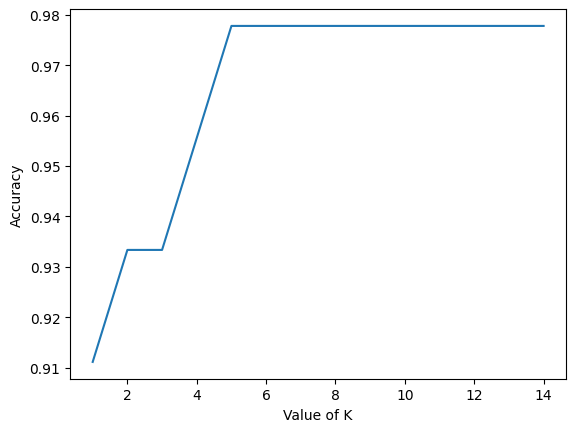

In [172]:
import matplotlib.pyplot as plt

plt.plot(range_k, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")